RIGOL TECHNOLOGIES,DS1104Z,DS1ZA224812889,00.04.04.SP4


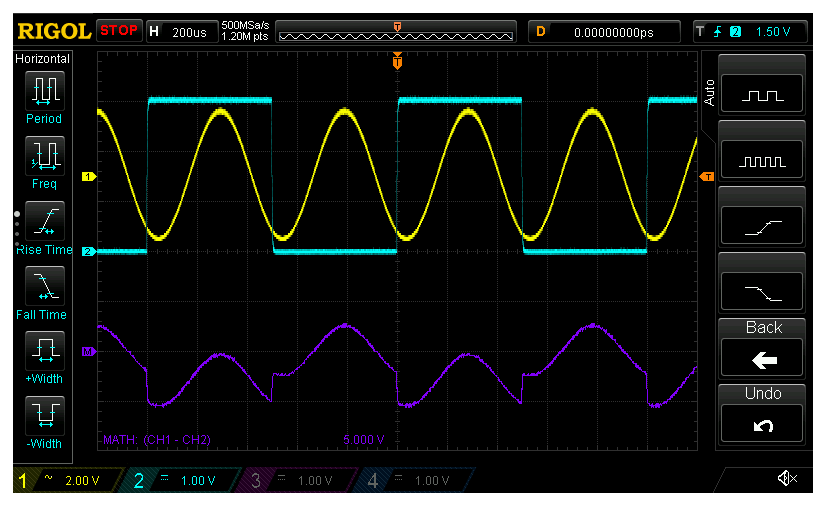

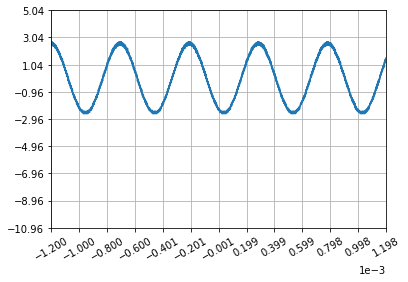

In [1]:
from rigol_ds1000z import Rigol_DS1000Z
from rigol_ds1000z import process_display, process_waveform
from time import sleep

with Rigol_DS1000Z() as oscope:
    # reset to defaults and print the IEEE 488.2 instrument identifier
    ieee = oscope.ieee(rst=True)
    print(ieee.idn)

    # configure channels 1 and 2, the timebase, and the trigger
    channel1 = oscope.channel(1, probe=1, coupling="AC", offset=3.0, scale=2)
    channel2 = oscope.channel(2, probe=1, scale=1, display=True)
    timebase = oscope.timebase(main_scale=200e-6)
    trigger = oscope.trigger(mode="EDGE", source=2, coupling="DC", level=1.5)

    # send an SCPI commands to setup the math channel
    oscope.write(":MATH:DISPlay ON")
    oscope.write(":MATH:OPER SUBT")
    oscope.write(":MATH:SOUR2 CHAN2")
    oscope.write(":MATH:SCAL 5")
    oscope.write(":MATH:OFFS -10")

    # wait three seconds then single trigger
    sleep(3)
    oscope.single()

    # capture the display image
    display = oscope.display()
    process_display(display, show=True)

    # plot the channel 1 waveform data
    waveform = oscope.waveform(source=1)
    process_waveform(waveform, show=True)